In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
#from utils import XyScaler
#from roc_curve2 import roc_curve

In [3]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/ready12_24_train.csv') 

In [4]:
df_withID

,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,City_Type2_x,Job Type_x,online_score,y_target,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,Category 1,Category 2,Category 3
0,6578,4.0,0.0,0.0,0.0,2.0,23384,9999,0,1.0,-25.0,278,253,34,59,Third,G,2100
1,6532,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,-24.0,99,75,161,185,First,F,2100
2,6543,4.0,0.0,0.0,0.0,2.0,23384,9999,0,0.0,-60.0,355,295,711,771,First,F,2100
3,6580,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,4.0,12,16,19,15,First,E,2100
4,6570,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,69.0,146,215,82,13,First,E,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,6538,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,-204.0,16,-188,188,392,First,F,2100
75274,6528,0.0,0.0,0.0,0.0,0.0,1729,9999,0,1.0,-73.0,31,-42,1,74,Third,G,2100
75275,6529,0.0,0.0,0.0,0.0,0.0,23384,9999,0,1.0,2.0,10,12,6,4,Second,A,2100
75276,6529,0.0,0.0,0.0,0.0,0.0,23384,9999,0,0.0,27.0,13,40,31,4,Second,A,2100


In [4]:
from preprocessing import drop_cols , one_hot_encoding , scale
data = drop_cols(df_withID) # drop cols

df_encode = one_hot_encoding(data, columns = ['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score']) 

In [5]:
df_encode.drop([
                                        'BFSI',
                                'Broadcasting',
                                  'Consulting',
                                   'Education',
                                        'Food',
                                      'Health',
                               'Manufacturing',
                                      'Others',
                                      'Retail',
                           'Software Industry',
                                  'Technology',
                                     'Telecom',
                                   'Transport'],axis=1,inplace=True)

df_encode1 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode2 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode3 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1) 
df_encode4 = df_encode.drop(['City_Type2_x','Job Type_x','Category 2','Category 3','Category 1', 'online_score','Health_Camp_ID'],axis=1)

In [6]:
df_encode1 = df_encode.copy()
df_encode2 = df_encode.copy()
df_encode3 = df_encode.copy()
df_encode4 = df_encode.copy()

In [7]:
df_encode1['y_target'] = df_withID['y_target'].values
df_encode2['y_target'] = df_withID['y_target'].values
df_encode3['y_target'] = df_withID['y_target'].values
df_encode4['y_target'] = df_withID['y_target'].values

In [8]:
df_encode2 = df_encode2.drop(['Job Type_x'], axis=1)

In [10]:
df_encode2_ = df_encode2.drop(['Category 1','Category 2','City_Type2_x', 'Category 3','Health_Camp_ID'],axis=1)
df_encode3_ = df_encode3.drop(['Category 1','Category 2','City_Type2_x', 'Category 3','Health_Camp_ID','Job Type_x'],axis=1)
df_encode1_ = df_encode1.drop(['Category 1','Category 2','City_Type2_x', 'Category 3','Health_Camp_ID','Job Type_x'],axis=1)
df_encode4_ = df_encode4.drop(['Category 1','Category 2','City_Type2_x', 'Category 3','Health_Camp_ID','Job Type_x'],axis=1)

In [11]:
df_encode1_,df_encode2_,df_encode3_,df_encode4_ = scale(df_encode1_) ,scale(df_encode2_) ,scale(df_encode3_) ,scale(df_encode4_)

In [12]:
df_encode1_

,Var1,Var2,Var3,Var4,Var5,online_score,y_target,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,1036,1216,1217,1352,1704,1729,2517,2662,23384,A,C,D,E,F,G,2100,Second,Third,1,2,3,4,9999
0,0.420086,-0.063285,-0.019631,-0.11236,1.442928,0,1.0,0.059341,0.257361,0.392104,-0.394391,-0.529413,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1
1,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,0.0,0.062659,-0.205094,-0.201865,-0.015115,-0.084562,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0.420086,-0.063285,-0.019631,-0.11236,1.442928,0,0.0,-0.056754,0.456294,0.532254,1.627418,1.984351,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,0.0,0.155535,-0.429863,-0.398743,-0.439187,-0.684758,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,0.0,0.371142,-0.083668,0.265302,-0.251043,-0.691819,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,0.0,-0.534405,-0.419529,-1.079472,0.065518,0.646266,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
75274,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,1.0,-0.099876,-0.380776,-0.592284,-0.492943,-0.476455,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
75275,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,1.0,0.148901,-0.435030,-0.412091,-0.478011,-0.723594,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1
75276,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613,0,0.0,0.231827,-0.427279,-0.318657,-0.403350,-0.723594,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     13585
         1.0       0.72      0.57      0.63      5235

    accuracy                           0.82     18820
   macro avg       0.78      0.74      0.76     18820
weighted avg       0.81      0.82      0.81     18820

[[12425  1160]
 [ 2273  2962]]


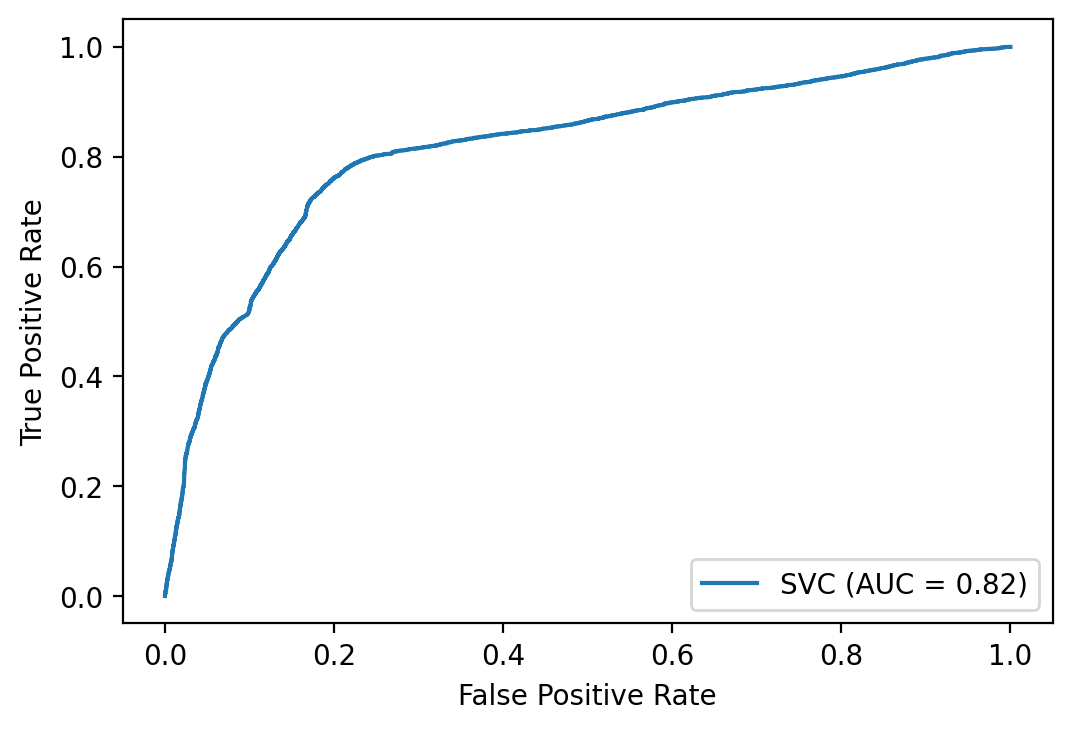

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86     13585
         1.0       0.67      0.54      0.60      5235

    accuracy                           0.80     18820
   macro avg       0.75      0.72      0.73     18820
weighted avg       0.79      0.80      0.79     18820

[[12197  1388]
 [ 2421  2814]]


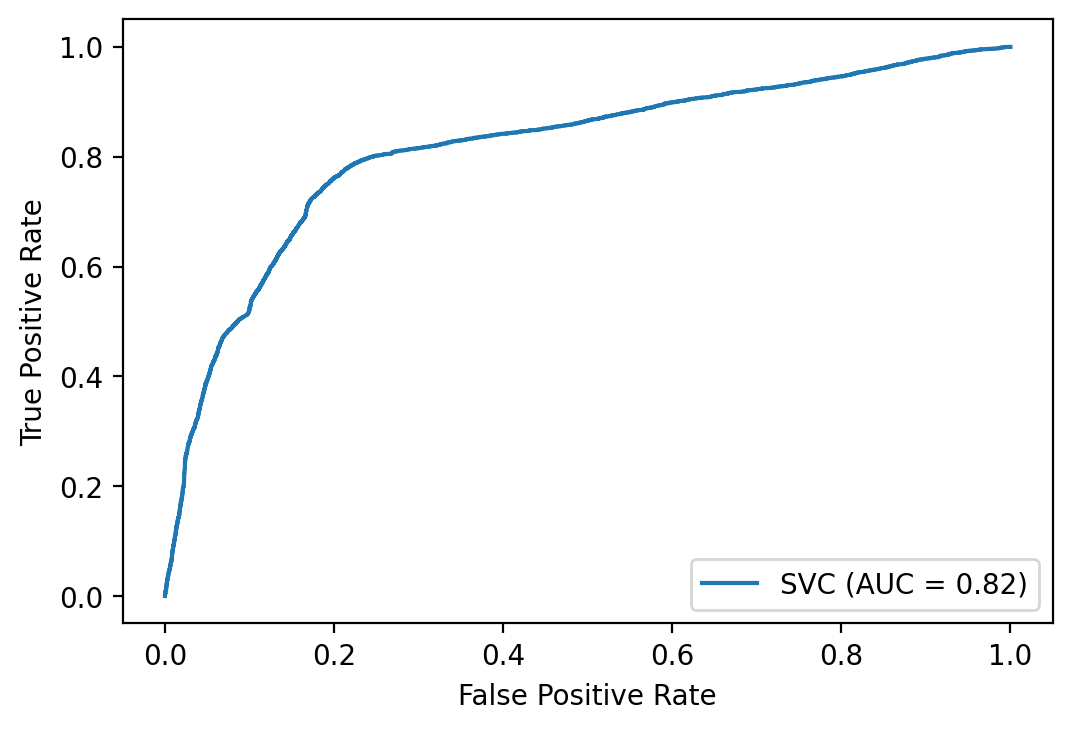

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

y = df_encode1_.pop('y_target')
X = df_encode1_

# y = cb4.pop('y_target')
# X = cb4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test, y_test)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:,1]


print(classification_report(y_test,rfc_preds) ) 
print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()
svc_preds = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)[:,1]

predsx , preds2x = svc_proba  >= .5 , svc_proba  >= .4

print(classification_report(y_test,svc_preds) )
print(confusion_matrix(y_test,svc_preds)) 
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [15]:
X_test['Proba'] = svc_proba
X_test['Prediction'] = svc_preds
X_test['y_target'] = y_test

<ipython-input-15-196d8af72120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Proba'] = svc_proba
<ipython-input-15-196d8af72120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Prediction'] = svc_preds
<ipython-input-15-196d8af72120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [16]:
df_1 = X_test[(X_test['y_target']==1) & (X_test['Prediction']==1)]
df_0 = X_test[(X_test['y_target']==0) & (X_test['Prediction']==0)]
df_10 = X_test[(X_test['y_target']==1) & (X_test['Prediction']==0)]
df_01 = X_test[(X_test['y_target']==0) & (X_test['Prediction']==1)]

In [17]:
frames = [df_01,df_10]
frames2 = [df_1,df_0]
df_f = pd.concat(frames)
df_f2 = pd.concat(frames2)

In [18]:
df_10_ = df_f.copy()
df_10_2 = df_f2.copy()
#Making copies to do KNN
del df_10_['Prediction']
del df_10_['Proba']
del df_10_2['Prediction']
del df_10_2['Proba']

In [19]:
yk = df_10_.pop('y_target')
Xk = df_10_

X_traink, X_testk, y_traink, y_testk = train_test_split(Xk, yk, random_state=42)

In [22]:
yk

48215    0.0
20060    0.0
66646    0.0
43685    0.0
42574    0.0
        ... 
21273    1.0
7892     1.0
998      1.0
18046    1.0
47884    1.0
Name: y_target, Length: 3809, dtype: float64

In [23]:
from sklearn.neighbors import KNeighborsClassifier

X_traink, X_testk, y_traink, y_testk = train_test_split(Xk, yk, random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_traink,y_traink)
pred = knn.predict(X_testk)

print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred))

[[346  15]
 [  3 589]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       361
         1.0       0.98      0.99      0.98       592

    accuracy                           0.98       953
   macro avg       0.98      0.98      0.98       953
weighted avg       0.98      0.98      0.98       953



In [27]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_traink,y_traink)
    pred_i = knn.predict(X_testk)
    error_rate.append(np.mean(pred_i != y_testk))

Text(0, 0.5, 'Error Rate')

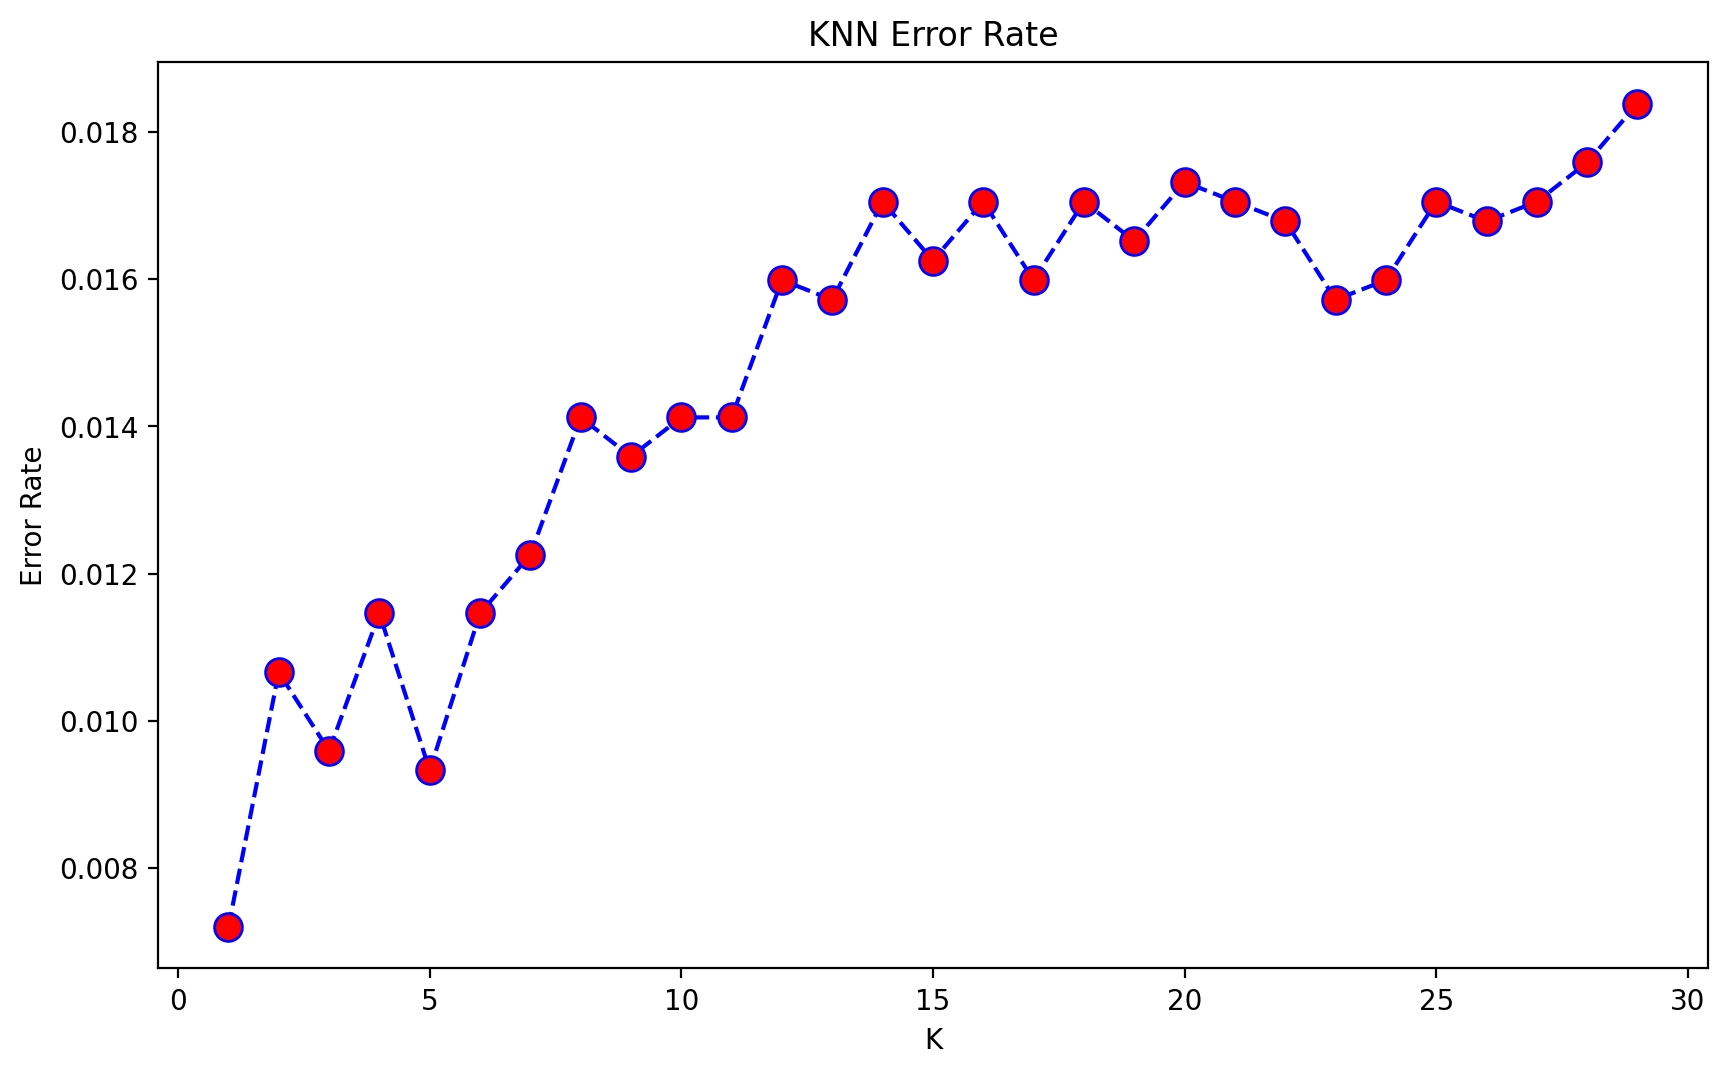

In [28]:
yk = df_10_2.pop('y_target')
Xk = df_10_2
X_traink, X_testk, y_traink, y_testk = train_test_split(Xk, yk, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)

error_rate = []

for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_traink,y_traink)
    pred_i = knn2.predict(X_testk)
    error_rate.append(np.mean(pred_i != y_testk))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.title('KNN Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

[[3032   11]
 [  24  686]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3043
         1.0       0.98      0.97      0.98       710

    accuracy                           0.99      3753
   macro avg       0.99      0.98      0.98      3753
weighted avg       0.99      0.99      0.99      3753



In [31]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_traink,y_traink)
pred = knn2.predict(X_testk)
print(confusion_matrix(y_testk,pred))
print(classification_report(y_testk,pred)) 

[[3034    9]
 [  34  676]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3043
         1.0       0.99      0.95      0.97       710

    accuracy                           0.99      3753
   macro avg       0.99      0.97      0.98      3753
weighted avg       0.99      0.99      0.99      3753

